In [21]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import math

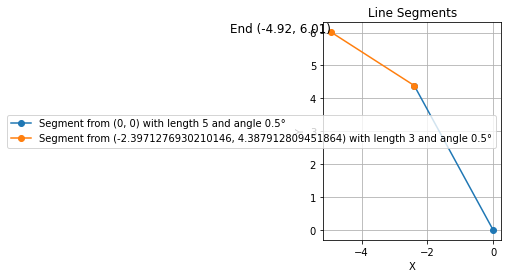

In [29]:


# Function to plot line segments
def plot_line_segments(segments):
    plt.figure()

    start_pos = segments[0][0]
    prev_theta = math.pi/2

    # math.pi/2
    # math.pi/2 + (-0.667)

    
    for i, segment in enumerate(segments):
        initial_position, length, theta = segment
        x0, y0 = start_pos
        theta_rad = theta  + prev_theta

        prev_theta = theta_rad
        
        # Calculate the end position
        x1 = x0 + length * np.cos(theta_rad)
        y1 = y0 + length * np.sin(theta_rad)
        
        # Plot the line segment
        plt.plot([x0, x1], [y0, y1], marker='o', label=f'Segment from ({x0}, {y0}) with length {length} and angle {theta}°')

        start_pos = (x1,y1)

        # Add a label to the final position of the last segment
        if i == len(segments) - 1:
            plt.text(x1, y1, f'End ({x1:.2f}, {y1:.2f})', fontsize=12, ha='right')
    
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Line Segments')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Example usage

start_pos = (0,0)
segments = [
    (start_pos, 5, 0.5),
    ((1, 2), 3, 0.5)
]

plot_line_segments(segments)


In [31]:
#  take the algorithm i had for FK in 3d

L = [5,3]
joint_axes = [[1,0,0],[1,0,0]]
joint_frames = []
theta = [0,0]
num_joints = 2
up = [0,0,1]

base_pos = np.array([0,0,0])

# list of joint frames in the form of 4x4 matrices
# the first 3x3 is the rotation in relation to the world frame
# forward is x, up is z, and y is the cross between
# [1, 0, 0]
# [0, 1, 0]
# [0, 0, 1]
# the 4th column is the position offset from the start
# [x,y,z,1]Transpose

joint_frames = []



def forward_kinematics_initializing():

    for i in range(num_joints):
        joint_frame = np.identity(4)
        

        rel_pos = L[i] * joint_frame[0:3,2]
        joint_frame[:3,3] = rel_pos

        print(joint_frame)

forward_kinematics_initializing()
        







def forward_kinematics(theta):

    M = np.array([
        [1,0,0,0],
        [0,1,0,0],
        [0,0,1,L[0]+L[1]]])
    
    S1 = np.zeros((4,4))

    ux = joint_axes[0][0]
    uy = joint_axes[0][1]
    uz = joint_axes[0][2]

    w_box_1 =  np.array([
        [0,-uz, uy],
        [uz,0,-ux],
        [-uy,ux,0]
    ])

    S1[0:3,0:3] = w_box_1

    S2 = np.zeros((4,4))

    ux = joint_axes[1][0]
    uy = joint_axes[1][1]
    uz = joint_axes[1][2]


    v_i = np.cross(-joint_axes[0], 

    w_box_2 =  np.array([
        [0,-uz, uy],
        [uz,0,-ux],
        [-uy,ux,0]
    ])

    S2[0:3,0:3] = w_box_2

    
    pass


#forward kinematic equation
def get_pos_from_theta(theta):

    # also construct the jacobian in this process

    J = np.zeros([6,num_joints])
    
    # start with the position of end effector with theta = 0
    M = np.array([
        [1,0,0,0],
        [0,1,0,0],
        [0,0,1,0],
        [0,0,0,1]
    ])

    total_L = np.sum(L)
    pos = total_L * np.array(up)

    M[:3,3] = pos

    #print(pos_M)
    

    # now generate the screw matrices for all the arms to apply to the pos_M
    screw_matrices = []
    partial_L_to_joint = 0
    for i in range(num_joints):
        ux = joint_axes[i][0]
        uy = joint_axes[i][1]
        uz = joint_axes[i][2]

        joint_to_base = -np.array(up)

        K = np.array([
            [0,-uz, uy],
            [uz,0,-ux],
            [-uy,ux,0]
        ])

        v_i = np.cross(joint_axes[i],joint_to_base) * partial_L_to_joint

        J[0:3,i] = joint_axes[i]
        J[3:6,i] = v_i
        
        S_i = np.array([
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0],
            [0,0,0,0]
        ])

        S_i[0:3,0:3] = K
        S_i[0:3,3] = v_i
        #print(S_i)
        partial_L_to_joint += L[i]

        screw_matrices.append(S_i)

        #print(J)

        J_pinv = np.linalg.pinv(J)


    # now compute the matrix exponential of e^(S0*theta0)*e^(S1*theta1)*M

    matrix_exponential_product = M

    #print(screw_matrices)

    for i in range(num_joints):
        matrix_exp_i = expm(screw_matrices[i]*theta[i])
        #print(matrix_exp_i)
        #print(matrix_exponential_product)
        matrix_exponential_product = np.matmul(matrix_exp_i,matrix_exponential_product)

    #print(matrix_exponential_product)
    return matrix_exponential_product, J_pinv


a,b = get_pos_from_theta([0.5,0.5])
print(a)

rounded_array = np.round(b, 2)

# Print the rounded array
print(rounded_array)




SyntaxError: invalid syntax (<ipython-input-31-9cde45ceff73>, line 81)

In [73]:
#  take the algorithm i had for FK in 3d

L = [5,3]
joint_axes = [[1,0,0],[1,0,0]]
joint_frames = []
theta = [0,0]
num_joints = 2
up = [0,0,1]

base_pos = np.array([0,0,0])

# list of joint frames in the form of 4x4 matrices
# the first 3x3 is the rotation in relation to the world frame
# forward is x, up is z, and y is the cross between
# [1, 0, 0]
# [0, 1, 0]
# [0, 0, 1]
# the 4th column is the position offset from the start
# [x,y,z,1]Transpose

joint_frames = []

def get_pos_from_4by4(matrix):
    return matrix[:3,3]


def forward_kinematics_initializing():
    #this function loads all the frames of the robot, index 0 is the frame of joint 0
    # index -1 is the end effector frame

    #initialize world frame as identity, 0 rotation, origin is 0,0
    joint_frames.append(np.identity(4))

    for i in range(num_joints):
        joint_frame = np.identity(4)
        rel_pos = L[i] * joint_frame[0:3,2]
        
        
        joint_frame[:3,3] = rel_pos + get_pos_from_4by4(joint_frames[i])

        #print(joint_frame)
        joint_frames.append(joint_frame)

forward_kinematics_initializing()
print(joint_frames)


transformed_frames = joint_frames.copy()

def get_vi_from_4by4(matrix):
    x = matrix[2,1]
    y = matrix[0,2]
    z = matrix[1,0]
    return np.array(x,y,z)

def forward_kinematics(joint_frames, theta):

    # matrix exponentials set up

    S = []

    

    for i in range(num_joints):
        ux = joint_axes[i][0]
        uy = joint_axes[i][1]
        uz = joint_axes[i][2]

        u_i_box = np.array([
            [0,-uz, uy],
            [uz,0,-ux],
            [-uy,ux,0]
        ])

        w_i = np.array(joint_axes[i])

        vi = np.cross(joint_axes[i],get_pos_from_4by4(joint_frames[i])-get_pos_from_4by4(joint_frames[0]))

        

        S_i = np.zeros((4,4))
        S_i[0:3,0:3] = u_i_box
        S_i[0:3,3] = vi

        
        S.append(S_i)

    
        # do the matrix exponentiation for each of the frames
        # for frame 0 just do it for e^[S0]theta0, etc
    
        # transfrom end effector

    result_frames = joint_frames.copy()


    
    end_effector = joint_frames[-1]
    
    for i in range(num_joints):
        index = -(i+1)
        
        end_effector = np.matmul(expm(S[index]*theta[index]),end_effector)

    

    result_frames[-1] = end_effector

   

    #transform the joint rotations
    for i in range(num_joints):

        transformed_frame = joint_frames[i]

        for j in range(i+1):
            index = i - j
            

            transformed_frame = np.matmul(expm(S[index]*theta[index]),transformed_frame)

        result_frames[i] = transformed_frame
        

    J = np.zeros((3,num_joints))

    for i in range(num_joints):
        vi = np.cross(joint_axes[i],get_pos_from_4by4(result_frames[i])-get_pos_from_4by4(joint_frames[0]))
        wi = get_pos_from_4by4(result_frames[i])

        J[0:3,i] = vi
        #J[3:6,i] = wi

    
    
    return result_frames, J

    

theta_0 = np.array([-math.pi/4.00,0])

xd = np.array([0,4,5])

theta_i = theta_0
for i in range(10):

    result_frames, J = forward_kinematics(transformed_frames,theta_i)
    J_pinv = np.linalg.pinv(J)

    end_effector_pos = get_pos_from_4by4(result_frames[-1])
    e = xd - end_effector_pos

    theta_i = theta_i + np.matmul(J_pinv,e) 

    print(get_pos_from_4by4(result_frames[-1]))



print("BREAKKKK")

print(J)
print(J_pinv)





theta_1 = theta_0 + np.matmul(J_pinv,e)


result_frames, J = forward_kinematics(transformed_frames,theta_1)


J_pinv = np.linalg.pinv(J)
print(result_frames[-1])
print(J)
print(J_pinv)








[array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]), array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 5.],
       [0., 0., 0., 1.]]), array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 8.],
       [0., 0., 0., 1.]])]
[0.         5.65685425 5.65685425]
[0.         4.26941247 6.86075447]
[0.         5.5552177  5.75737927]
[0.         4.3775603  6.77867669]
[0.         5.47409412 5.83605096]
[0.         4.46295874 6.7125935 ]
[0.        5.4074136 5.8997027]
[0.         4.5324197  6.65799956]
[0.         5.35149603 5.95238995]
[0.         4.59009534 6.61208401]
BREAKKKK
[[ 0.          0.        ]
 [ 0.         -4.27032603]
 [ 0.          2.71495013]]
[[ 0.          0.          0.        ]
 [ 0.         -0.16676636  0.10602525]]
[[ 1.          0.          0.          0.        ]
 [ 0.          0.65401864  0.75647843  6.29868572]
 [ 0.         -0.75647843  0.65401864  4.96670841]
 [ 0.          0.      

In [ ]:
[0.         7.79999999 5.40000001] - [0, 5, 4] = [0, 2.7999, 1.4000]
[0.         5.84291793 6.61293719] - [0, 4, 5] = [0, 1.84,   1.6129]